In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../dataset/Resumes/data/Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [4]:
df['Category'].value_counts()

Category
BUSINESS-DEVELOPMENT      174
HEALTHCARE                167
INFORMATION-TECHNOLOGY    165
HR                        153
ENGINEERING               148
SALES                     142
ACCOUNTANT                140
TEACHER                   135
CONSULTANT                120
FINANCE                   120
PUBLIC-RELATIONS          113
CONSTRUCTION              110
DESIGNER                  109
CHEF                       98
AVIATION                   96
DIGITAL-MEDIA              87
FITNESS                    85
BANKING                    85
ADVOCATE                   67
APPAREL                    57
BPO                        51
AGRICULTURE                30
ARTS                       23
AUTOMOBILE                  9
Name: count, dtype: int64

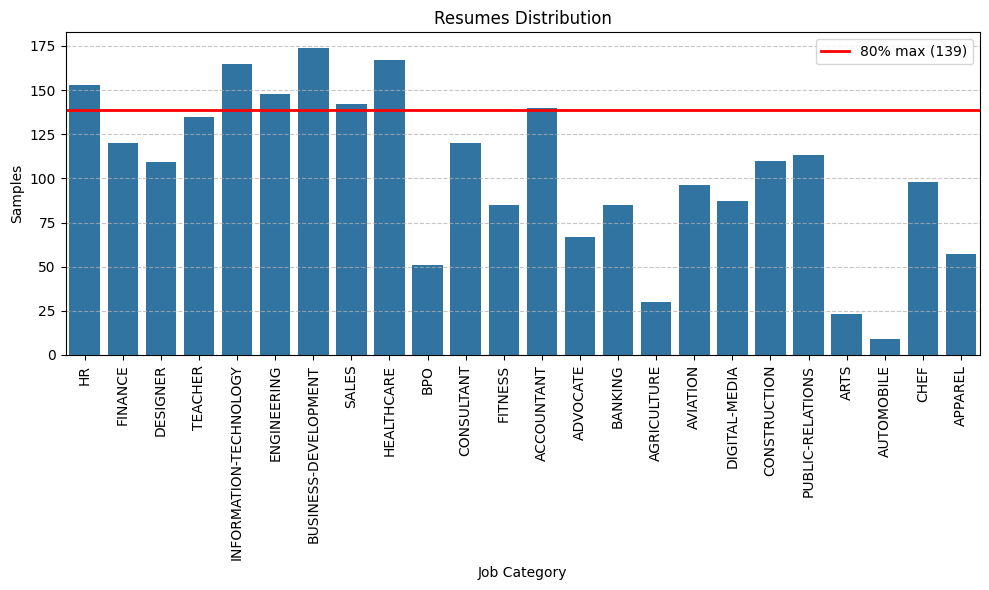

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Category', order=df['Category'].unique())

# Calcola l'altezza massima tra le barre
max_count = df['Category'].value_counts().max()
threshold = int(0.8 * max_count)

# Aggiungi la griglia
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Aggiungi la linea rossa all'80% del massimo
plt.axhline(y=threshold, color='red', linestyle='-', linewidth=2, label=f'80% max ({threshold})')
#plt.axhline(y=96, color='red', linestyle='-', linewidth=2, label=f'80% max ({threshold})')

# Titoli e label
plt.title('Resumes Distribution')
plt.xlabel('Job Category')
plt.ylabel('Samples')
plt.xticks(rotation=90)

# Mostra legenda e layout ordinato
plt.legend()
plt.tight_layout()
plt.show()


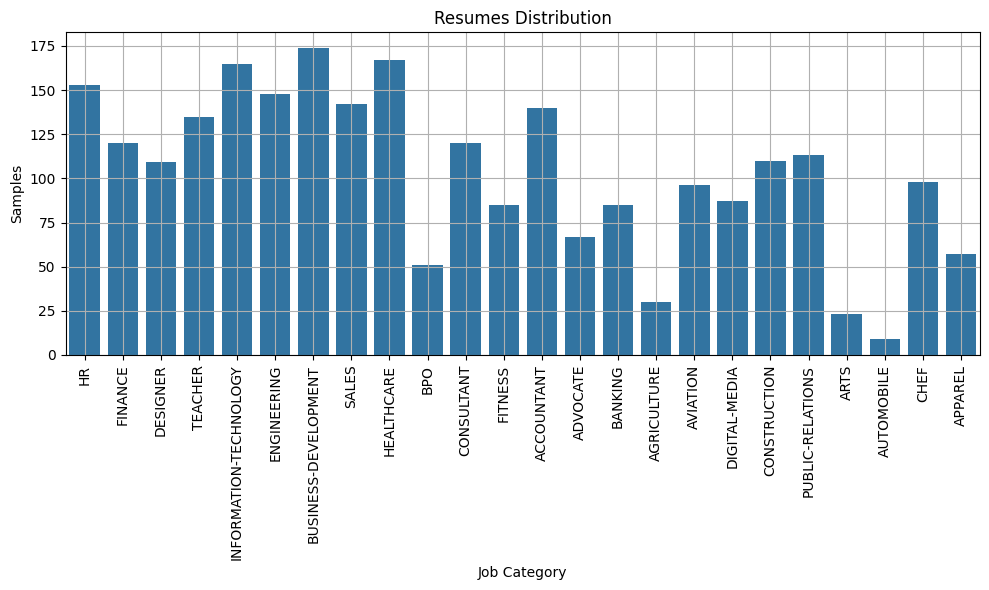

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].unique())

plt.title('Resumes Distribution')
plt.xlabel('Job Category')
plt.ylabel('Samples')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

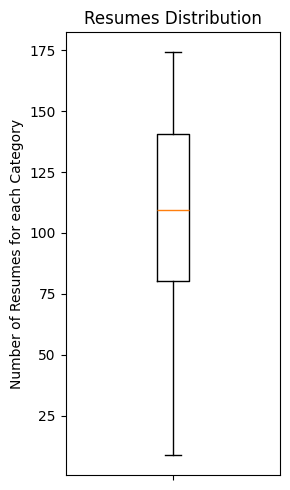

In [ ]:
plt.figure(figsize=(3, 5))
plt.boxplot(df['Category'].value_counts())
plt.title('Resumes Distribution')
plt.ylabel('Number of Resumes for each Category')
plt.xticks([1], [""])
plt.tight_layout()
plt.show()

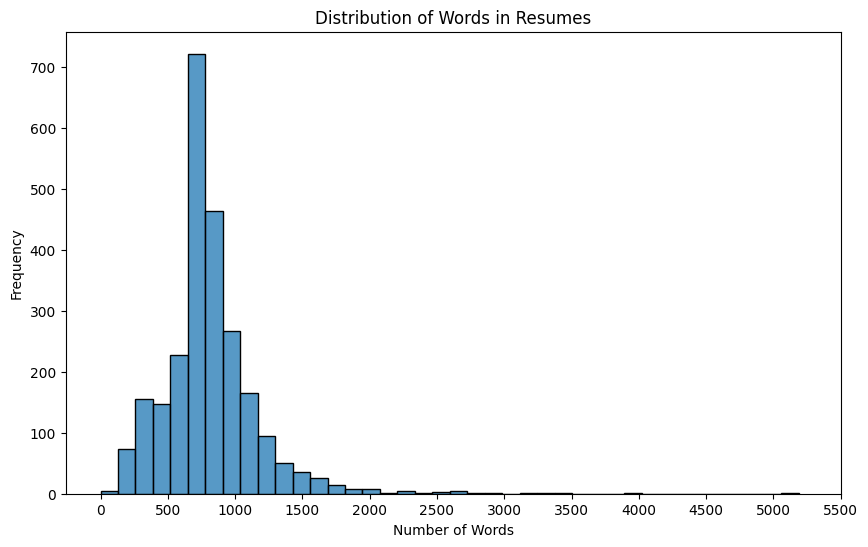

In [ ]:
word_count = df['Resume_str'].apply(lambda x: len(str(x).split()))      # For each resume, "word_count" contains the number of words
max_word_count = word_count.max()

plt.figure(figsize=(10, 6))
sns.histplot(word_count, bins=40)
plt.title('Distribution of Words in Resumes')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, max_word_count+500, 500))
plt.show()

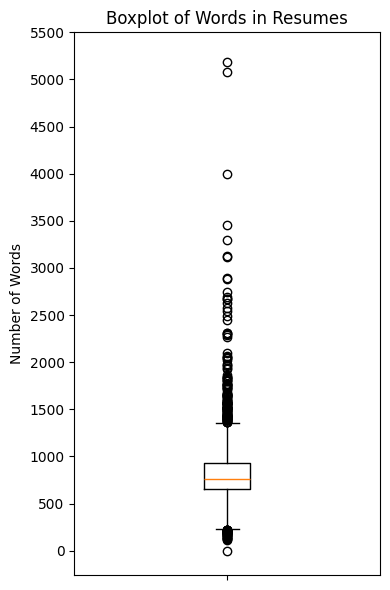

In [ ]:
plt.figure(figsize=(4, 6))
plt.boxplot(word_count)
plt.title('Boxplot of Words in Resumes')
plt.ylabel('Number of Words')
plt.xticks([1], [""])
plt.yticks(np.arange(0, max_word_count+500, 500))
plt.tight_layout()
plt.show()

In [ ]:
desc = word_count.describe()
q1 = word_count.quantile(0.25)
q3 = word_count.quantile(0.75)
iqr = q3 - q1

print("Statistics of Word Count in Resumes:")
print(f"Minimum      : {desc['min']}")
print(f"1st Quartile : {q1}")
print(f"Median       : {desc['50%']}")
print(f"3rd Quartile : {q3}")
print(f"Maximum      : {desc['max']}")
print(f"Mean         : {desc['mean']:.2f}")
print(f"IQR (Q3 - Q1): {iqr}")

Statistics of Word Count in Resumes:
Minimum      : 0.0
1st Quartile : 651.0
Median       : 757.0
3rd Quartile : 933.0
Maximum      : 5190.0
Mean         : 811.33
IQR (Q3 - Q1): 282.0


From the boxplot showing the number of words in the resumes and from the statistics we just calculated, we notice that there is an empty resume (this did not appear when we used df.info() because the resume is not null, but it contains no words). Therefore, we will take care of removing it during the preprocessing phase